In [1]:
import cv2, glob
from google.colab.patches import cv2_imshow
import os
import numpy as np

In [2]:
import cv2
import matplotlib.pyplot as plt

def plot_images_with_labels(images, num_rows, num_cols, name):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

    for i in range(num_rows):
        for j in range(num_cols):
            index = i * num_cols + j
            if index < len(images):
                img = images[index]
                img_resized = cv2.resize(img, (256, 256))
                label = f"{name} {index + 1}"
                axes[i, j].imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
                axes[i, j].set_title(label)
                axes[i, j].axis('off')

    plt.show()

In [3]:
# Download cascade .xml
!gdown 1xNjHecfoI4AiJZ3ZW-amRMcTh8uRzkpM
!unzip /content/backbone-20231119T092627Z-001.zip
!rm /content/backbone-20231119T092627Z-001.zip

Downloading...
From: https://drive.google.com/uc?id=1xNjHecfoI4AiJZ3ZW-amRMcTh8uRzkpM
To: /content/backbone-20231119T092627Z-001.zip
100% 295k/295k [00:00<00:00, 4.46MB/s]
Archive:  /content/backbone-20231119T092627Z-001.zip
  inflating: backbone/cars.xml       
  inflating: backbone/haarcascade_frontalface_default.xml  
  inflating: backbone/pedestrian.xml  
  inflating: backbone/haarcascade_fullbody.xml  


###Face Detection

In [4]:
#download img cr7
!gdown 1H6tX3ctF8s5JTF9qpQzICx9iqOpgBIbb
!unzip /content/cr7-20231119T091431Z-001.zip
!rm /content/cr7-20231119T091431Z-001.zip

Downloading...
From: https://drive.google.com/uc?id=1H6tX3ctF8s5JTF9qpQzICx9iqOpgBIbb
To: /content/cr7-20231119T091431Z-001.zip
100% 106k/106k [00:00<00:00, 2.68MB/s]
Archive:  /content/cr7-20231119T091431Z-001.zip
  inflating: cr7/cr7_4.jpg           
  inflating: cr7/cr7_5.jpg           
  inflating: cr7/cdr7_6.jpg          
  inflating: cr7/cr7_3.jpg           
  inflating: cr7/cr7_2.jpg           
  inflating: cr7/cr7_1.jpg           


In [5]:
folder_path = '/content/cr7'

all_images_face = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(root, file)
            all_images_face.append(image_path)

all_images_face

['/content/cr7/cr7_5.jpg',
 '/content/cr7/cr7_2.jpg',
 '/content/cr7/cr7_4.jpg',
 '/content/cr7/cr7_1.jpg',
 '/content/cr7/cr7_3.jpg',
 '/content/cr7/cdr7_6.jpg']

In [6]:
detect = cv2.CascadeClassifier("/content/backbone/haarcascade_frontalface_default.xml")

In [7]:
final_imgs = []
for image in all_images_face:
    img = cv2.imread(image)
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(grey,(5,5),0)
    dilated = cv2.dilate(blur,np.ones((3,3)))
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
    closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)

    faces = detect.detectMultiScale(closing, 1.1, 1)

    for (x, y, w, h) in faces:
        final_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    final_imgs.append(final_img)

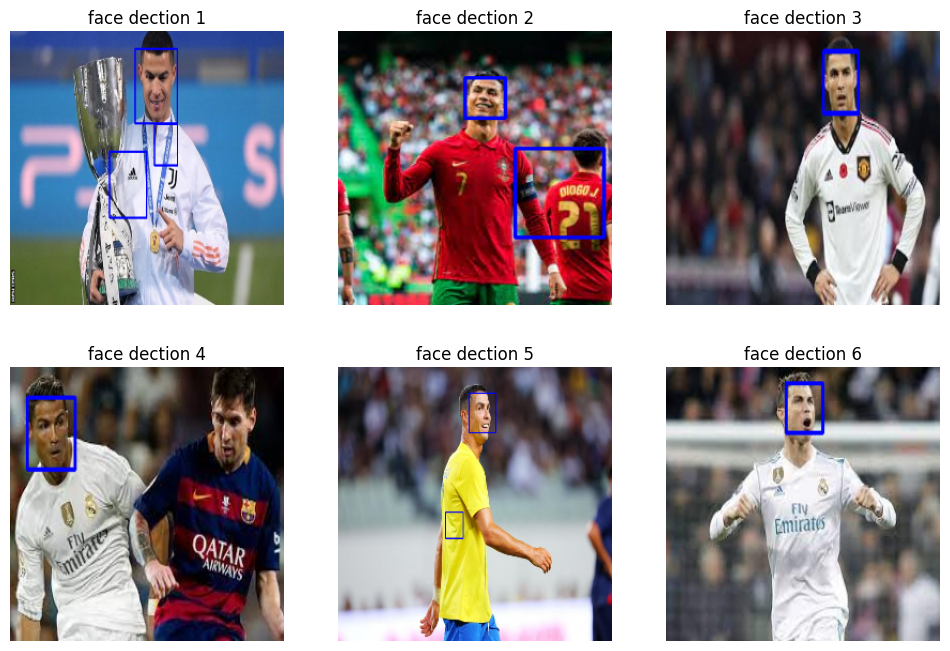

In [8]:
plot_images_with_labels(final_imgs, 2, 3, "face dection")  # 2 hàng, mỗi hàng chứa 3 ảnh

###Car dectection

In [9]:
#Download car img
!gdown 1Ve-sU8zvV-O2xvE1zJSAOv4EXPNwJ-9e
!unzip /content/vehicle-20231119T091440Z-001.zip
!rm /content/vehicle-20231119T091440Z-001.zip

Downloading...
From: https://drive.google.com/uc?id=1Ve-sU8zvV-O2xvE1zJSAOv4EXPNwJ-9e
To: /content/vehicle-20231119T091440Z-001.zip
100% 2.52M/2.52M [00:00<00:00, 21.1MB/s]
Archive:  /content/vehicle-20231119T091440Z-001.zip
  inflating: vehicle/car_8.jpg       
  inflating: vehicle/car6.jpg        
  inflating: vehicle/car_2.jpg       
  inflating: vehicle/car_3.jpeg      
  inflating: vehicle/car_9.jpg       
  inflating: vehicle/car_7.jpg       


In [10]:
folder_path = '/content/vehicle'

all_images_car = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(root, file)
            all_images_car.append(image_path)

all_images_car

['/content/vehicle/car_2.jpg',
 '/content/vehicle/car_7.jpg',
 '/content/vehicle/car_9.jpg',
 '/content/vehicle/car_8.jpg',
 '/content/vehicle/car_3.jpeg',
 '/content/vehicle/car6.jpg']

In [11]:
car_detect = cv2.CascadeClassifier("/content/backbone/cars.xml")

In [12]:
final_imgs = []
for image in all_images_car:
    img = cv2.imread(image)
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(grey,(5,5),0)
    dilated = cv2.dilate(blur,np.ones((3,3)))
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
    closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)

    cars = car_detect.detectMultiScale(closing, 1.1, 1)

    for (x, y, w, h) in cars:
        final_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,210,0),2)

    final_imgs.append(final_img)

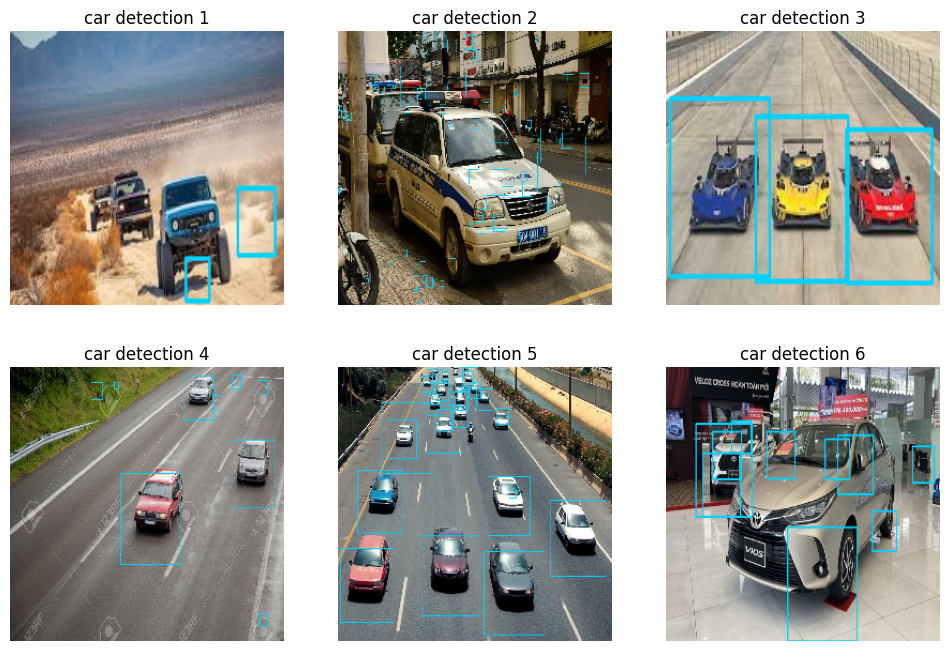

In [13]:
plot_images_with_labels(final_imgs, 2, 3, "car detection")

###Pedestrian detection

In [14]:
#Download pedesatrian img
!gdown 1RaxSdmma34QYCudbY5iHt1TDJJJSaGxW
!unzip /content/pedestrian-20231119T091437Z-001.zip
!rm /content/pedestrian-20231119T091437Z-001.zip

Downloading...
From: https://drive.google.com/uc?id=1RaxSdmma34QYCudbY5iHt1TDJJJSaGxW
To: /content/pedestrian-20231119T091437Z-001.zip
100% 653k/653k [00:00<00:00, 6.90MB/s]
Archive:  /content/pedestrian-20231119T091437Z-001.zip
  inflating: pedestrian/ngdibo_2.jpg  
  inflating: pedestrian/ngdibo_5.jpg  
  inflating: pedestrian/ngdibo_3.jpg  
  inflating: pedestrian/ngdibo_4.jpg  
  inflating: pedestrian/ngdibo_6.jpg  
  inflating: pedestrian/ngdibo_1.jpg  


In [15]:
folder_path = '/content/pedestrian'

all_images_pes = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(root, file)
            all_images_pes.append(image_path)
all_images_pes

['/content/pedestrian/ngdibo_3.jpg',
 '/content/pedestrian/ngdibo_1.jpg',
 '/content/pedestrian/ngdibo_6.jpg',
 '/content/pedestrian/ngdibo_2.jpg',
 '/content/pedestrian/ngdibo_4.jpg',
 '/content/pedestrian/ngdibo_5.jpg']

In [16]:
pes_detect = cv2.CascadeClassifier("/content/backbone/pedestrian.xml")

In [17]:
final_imgs = []
for image in all_images_pes:
    img = cv2.imread(image)
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(grey,(5,5),0)
    dilated = cv2.dilate(blur,np.ones((3,3)))
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
    closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)

    pesdestrians = pes_detect.detectMultiScale(closing,1.3,2)

    for (x, y, w, h) in pesdestrians:
        final_img = cv2.rectangle(img,(x, y), (x+w, y+h), (0, 255, 255), 2)

    final_imgs.append(final_img)

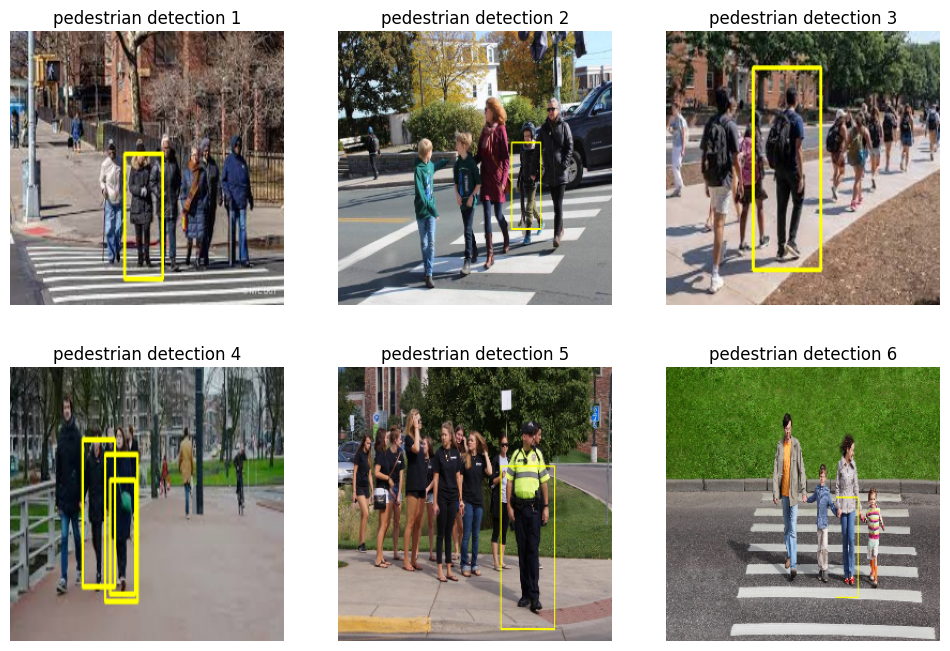

In [18]:
plot_images_with_labels(final_imgs, 2, 3, "pedestrian detection")

### Car and Pesdestrian dection

In [19]:
#Download data
!gdown 1KYk574NNAmDwm6kHAOCAJQZvxHvjtG7w
!unzip /content/car_pes-20231119T093709Z-001.zip
!rm /content/car_pes-20231119T093709Z-001.zip

Downloading...
From: https://drive.google.com/uc?id=1KYk574NNAmDwm6kHAOCAJQZvxHvjtG7w
To: /content/car_pes-20231119T093709Z-001.zip
100% 57.3k/57.3k [00:00<00:00, 71.0MB/s]
Archive:  /content/car_pes-20231119T093709Z-001.zip
  inflating: car_pes/test3.jpg       
  inflating: car_pes/test6.jpg       
  inflating: car_pes/test2.jpg       
  inflating: car_pes/test5.jpg       
  inflating: car_pes/test1.jpg       
  inflating: car_pes/test4.jpg       


In [28]:
folder_path = '/content/car_pes'

all_images_pes_car = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(root, file)
            all_images_pes_car.append(image_path)
all_images_pes_car

['/content/car_pes/test4.jpg',
 '/content/car_pes/test6.jpg',
 '/content/car_pes/test2.jpg',
 '/content/car_pes/test3.jpg',
 '/content/car_pes/test5.jpg',
 '/content/car_pes/test1.jpg']

In [29]:
car_detect = cv2.CascadeClassifier("/content/backbone/cars.xml")
pes_detect = cv2.CascadeClassifier("/content/backbone/haarcascade_fullbody.xml")

In [30]:
final_imgs = []
for image in all_images_pes_car:
    img = cv2.imread(image)
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(grey,(5,5),0)
    dilated = cv2.dilate(blur,np.ones((3,3)))
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
    closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)

    cars = car_detect.detectMultiScale(closing, 1.1, 1)
    pesdestrians = pes_detect.detectMultiScale(closing,1.3,2)


    for (x, y, w, h) in cars:
        final_img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)

    for (x, y, w, h) in pesdestrians:
        final_img = cv2.rectangle(img,(x, y), (x+w, y+h), (0, 255, 255), 2)

    final_imgs.append(final_img)

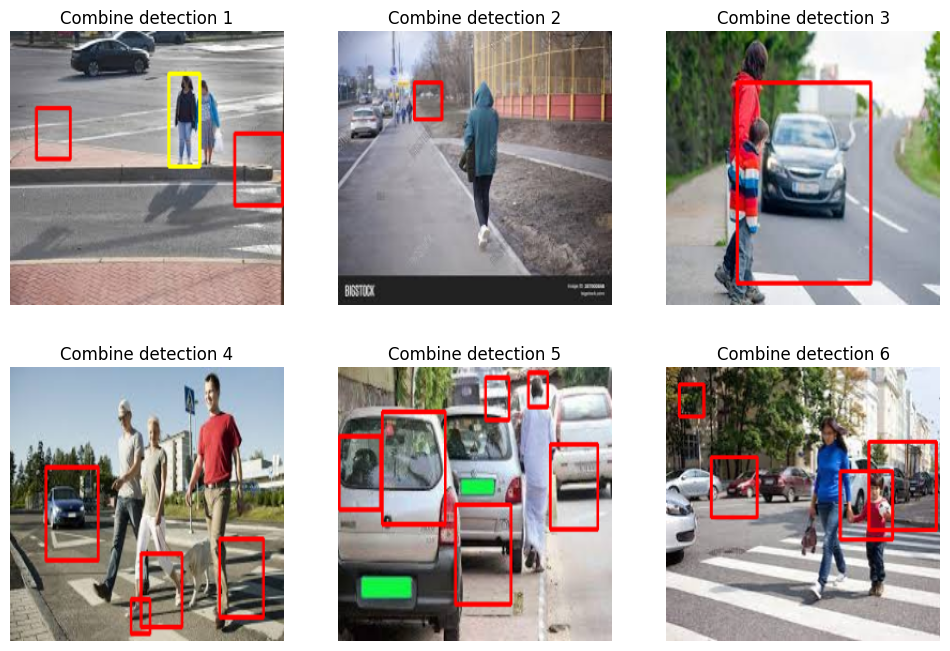

In [31]:
plot_images_with_labels(final_imgs, 2, 3, "Combine detection")